# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [2]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [3]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    return (1-x)**2 + 100*(y-x**2)**2
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    # YOUR CODE HERE
    return numpy.array([ (-2*(1-x) -400*x*(y-x**2)) , (200*(y-x**2)) ])

r = numpy.array([1, 4])
print(grad(r))

[-1200   600]


Before proceeding, ensure that your functions have been written correctly:

In [4]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [12]:
def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = numpy.empty( (nstep+1, 2) )
    # YOUR CODE HERE
    history[0] = r0
    for i in range(nstep):
        history[i+1] = history[i] - eta * df(history[i])
        
    
    return history


Test your answer:

In [13]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

0.57226494769864
[0.58025304 0.39962828]
0.3265949427567464
[0.73927661 0.59738442]
0.0012376833982024314
[1.00040585 0.99729402]


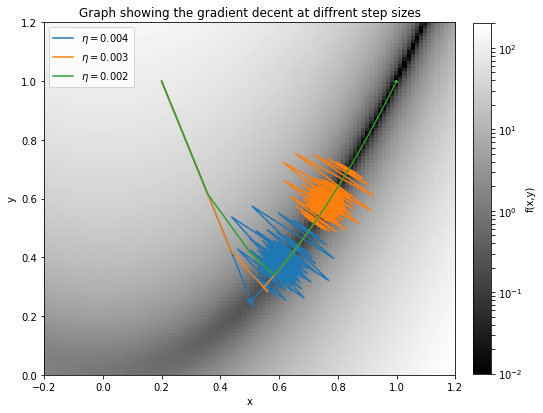

In [15]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
a =plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)
a.set_label("f(x,y)")

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
steps = 30000
for n in gammas:
    points = gradientDescent(grad, r0, n, steps)
    print(f(points[-1]))
    print(points[-1])
    plt.plot(points[:,0],points[:,1])
plt.legend([r'$\eta = $' + str(i) for i in gammas] )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph showing the gradient decent at diffrent step sizes")
    
plt.show()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

The best step size is 0.002. This is the best because it is the smallest and does not oscillate by such a wide margin like the others do when they get in the region of the minimum and therefore gets closest. The only constaining factor is that enough steps are used so that it can reach the region of the minimum. The bigger step sizes will just bounce around and not get close enogh to the minimum which theoretically is at 1,1.